# Kaggle Competition: Titanic
Predicting whether an idividual survived or not

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
#sns.get_dataset_names()
df = sns.load_dataset(name='titanic')

In [4]:
take_aways = []

## Titanic Exploratory Analysis

In [5]:
df.shape

(891, 15)

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [8]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [9]:
df.select_dtypes(include=[object]).columns

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

### Numeric Features

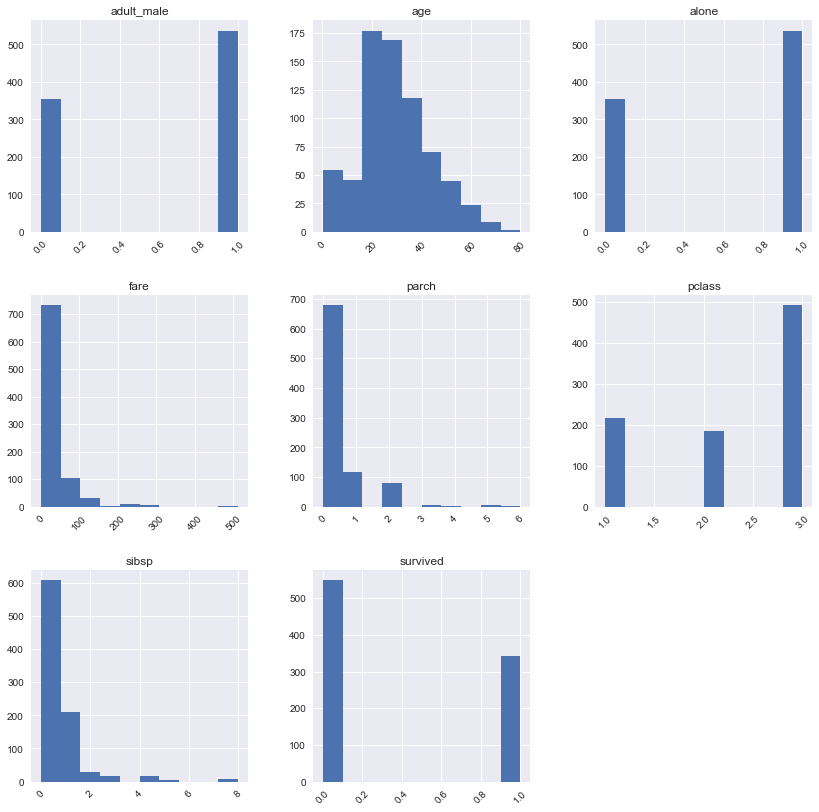

In [24]:
df.hist(figsize=(14,14),xrot=45)
plt.show()

In [25]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Categorical Features

In [26]:
df.describe(include=[object])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


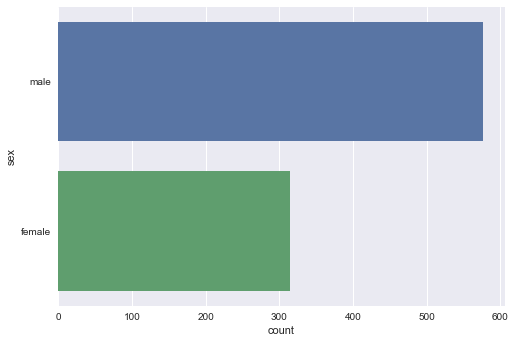

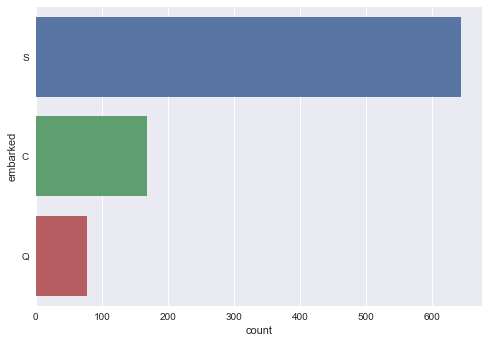

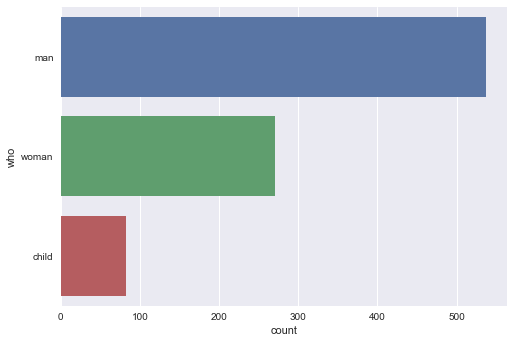

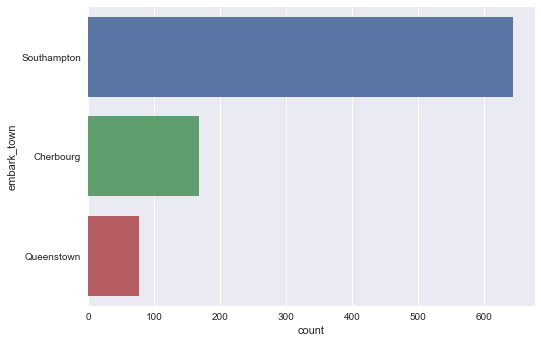

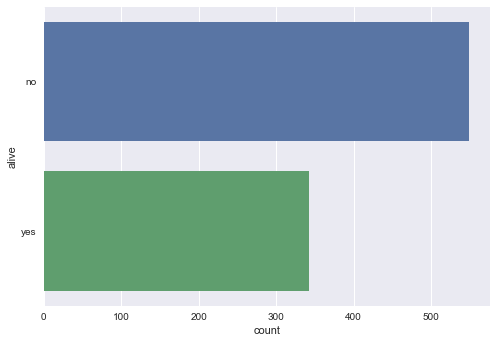

In [32]:
for col in df.select_dtypes(include=[object]).columns:
    #print(col)
    sns.countplot(data=df, y=col)
    plt.show()

### Segmentations

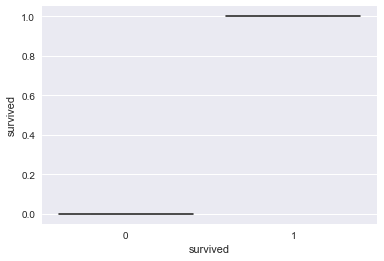

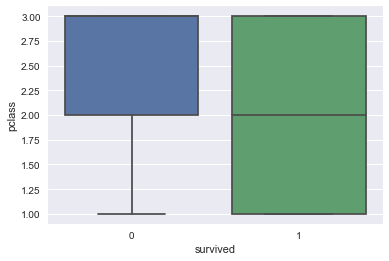

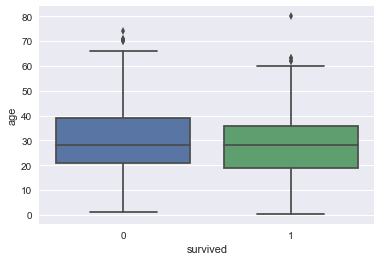

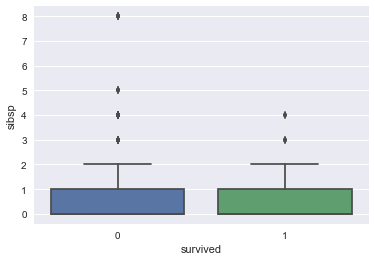

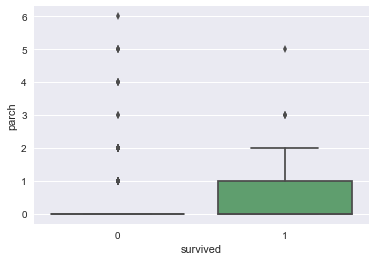

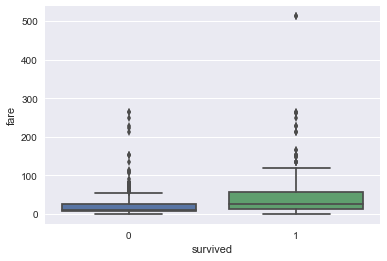

In [38]:
for col in df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(data=df, x='survived',y=col)
    plt.show()

### Correlations

In [39]:
correlations = df.corr()

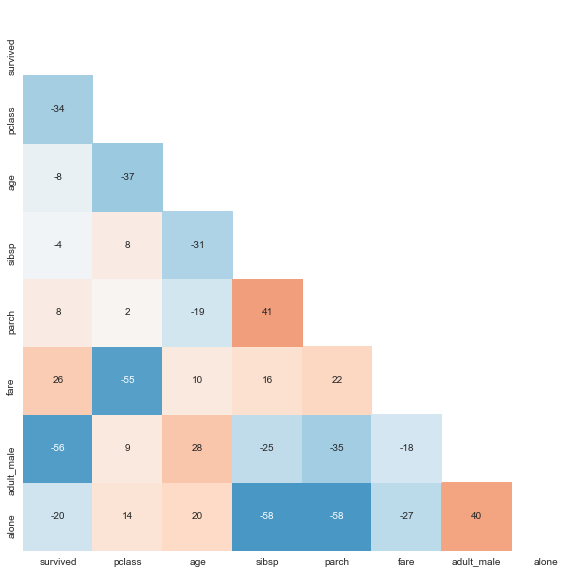

In [40]:
sns.set_style('white')

# mask for upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))

sns.heatmap(correlations*100, annot=True, fmt='.0f', mask=mask, cbar=False)

Save the dataframe to reuse for data cleaning

In [41]:
df.to_csv('titanic.csv', index=None)